In [0]:
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from numpy import mean
%matplotlib inline

In [0]:
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv', header=0, index_col=0)

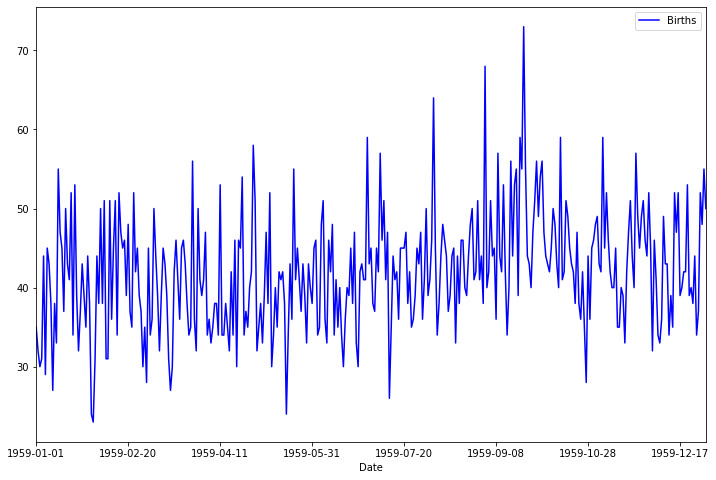

In [3]:
series.head()
series.plot(color='b', legend=True, figsize=(12,8))

# **Simple Smoothing Techniques**

A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value.

**Simple Moving Average Method**

The value at time (t) is calculated as the average of the raw observations at and before the time (t).

For example, a simple moving average with a window size of 3 would be calculated as:

```
# SMA(t) = mean(obs(t-2), obs(t-1), obs(t))
```




In [0]:
def SMA(ts, width):
  '''
  Compute the simple moving average of ts

    Arguments:
    ts -- the time series which is a pandas dataframe.
    width -- the moving window size
    Return:
    ts_SMA -- SMA(ts)
  '''
  ts_rolling = ts.rolling(window=width)# rolling cree les observations (t-2,t-1,t)
  ts_SMA = ts_rolling.mean()#moyenne des observations
  return ts_SMA

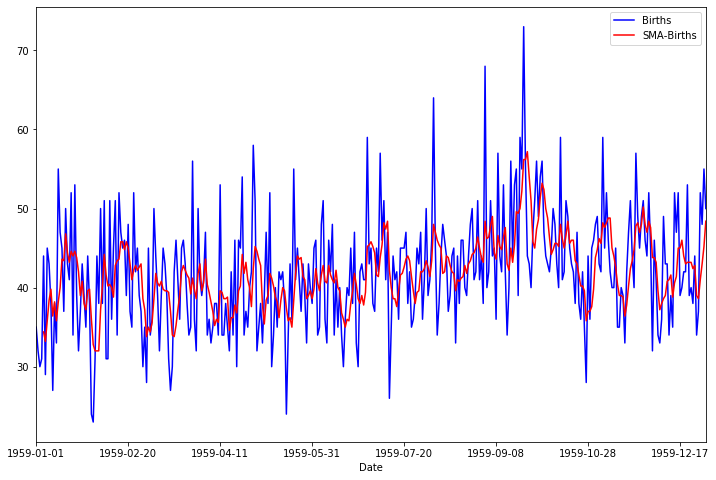

In [6]:
series_SMA = SMA(series, width=5)#width=ordre de la moyenne mobile
series_SMA.head(10)
X = pd.concat([series, series_SMA], axis=1, sort=False)
X.columns = ['Births', 'SMA-Births']
X.head(10)
# plot the original and transformed time series
X['Births'].plot(color='b', legend=True, figsize=(12,8))
X['SMA-Births'].plot(color='r', legend=True, figsize=(12,8))

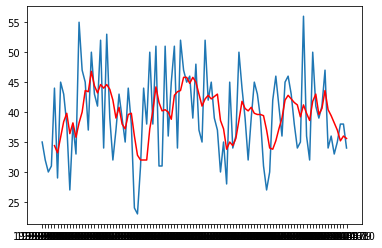

In [7]:
# plot the first 100 observations of the original and transformed time series
plt.plot(series.iloc[0:100,:])#iloc:acceder dataframe
plt.plot(series_SMA.iloc[0:100,:], color='red')
plt.show() 

In [8]:
print(X.iloc[0:100,1:2])

            SMA-Births
Date                  
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04         NaN
1959-01-05        34.4
...                ...
1959-04-06        38.2
1959-04-07        37.0
1959-04-08        35.2
1959-04-09        36.0
1959-04-10        35.6

[100 rows x 1 columns]


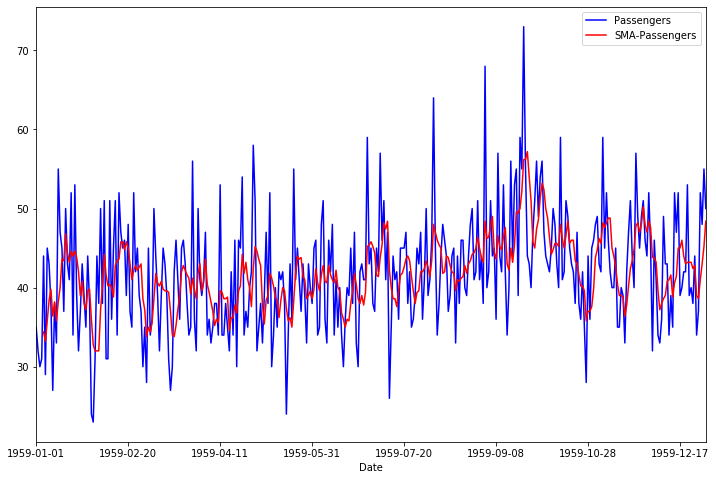

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',index_col='Month',parse_dates=True)
series_SMA = SMA(series, width=5)#width=ordre de la moyenne mobile
series_SMA.head(10)
X = pd.concat([series, series_SMA], axis=1, sort=False)
X.columns = ['Passengers', 'SMA-Passengers']
X.head(10)
# plot the original and transformed time series
X['Passengers'].plot(color='b', legend=True, figsize=(12,8))
X['SMA-Passengers'].plot(color='r', legend=True, figsize=(12,8))

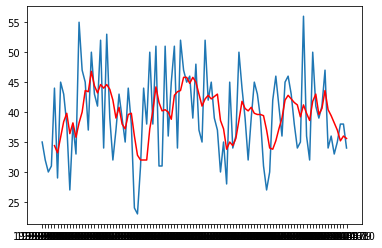

In [10]:
plt.plot(series.iloc[0:100,:])#iloc:acceder dataframe
plt.plot(series_SMA.iloc[0:100,:], color='red')
plt.show() 

# **Time series forecasting**

**Data Preparation**

In [11]:
# Data Splitting
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv', header=0, index_col=0)
X = series.values#transforme the dataframe to array
X_train = X[:250] 
X_test = X[250:]
print('The size of the dataset: ' + str(X.shape[0]))#shape appliquer seulement sur array
print('The size of the training set: ' + str(X_train.shape[0]))
print('The size of the testing set: ' + str(X_test.shape[0]))

The size of the dataset: 365
The size of the training set: 250
The size of the testing set: 115


In [12]:
def predict(X_train, X_test, width):
  predictions = []
  history = list(X_train)
  for t in range(len(X_test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-width, length)])
    obs = X_test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f-----expected=%f' %(yhat, obs))
  return predictions
for i in range (1,11):
  predictions=predict(X_train,X_test,width=i)
  error=mean_squared_error(X_test,predictions)
  if i==1:
      min_error=error
      order=i
  if error< min_error:
      min_error=error
      order=i
print('Test MES : %.3f' %error,'order i:',order)



Test MES : 55.852 order i: 7


In [13]:
results=dict()
for i in range(1,20):
  predictions=predict(X_train,X_test, width=i)
  error=mean_squared_error(X_test,predictions)
  results.update({str(i):error})
print (results)


{'1': 73.24347826086957, '2': 59.91086956521739, '3': 55.46280193236714, '4': 54.408152173913045, '5': 54.316869565217395, '6': 54.83115942028986, '7': 51.92954747116239, '8': 54.031929347826086, '9': 55.464519592055815, '10': 55.852086956521745, '11': 55.68501616960114, '12': 56.36678743961354, '13': 56.616979675842565, '14': 55.26601597160604, '15': 54.88185507246377, '16': 54.51966711956522, '17': 54.06845193320295, '18': 53.634916800858825, '19': 53.018186197759846}


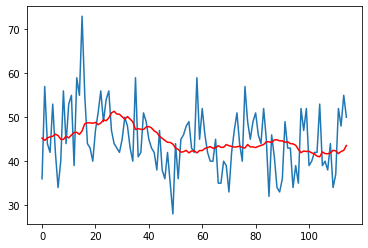

In [14]:
plt.plot(X_test)
plt.plot(predictions, color='red')
plt.show()

# **Exponential Smoothing**

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',index_col='Month',parse_dates=True)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


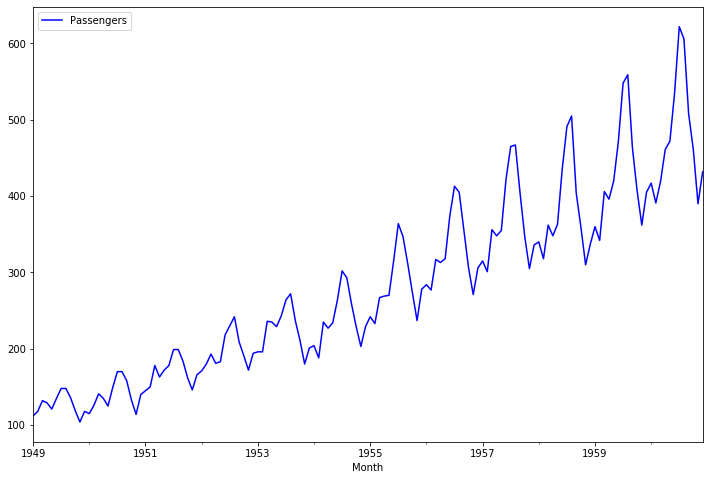

In [16]:
print(df.head())
df.plot(color='b', legend=True, figsize=(12,8))

The size of the training data: 108
The size of the testing data: 36


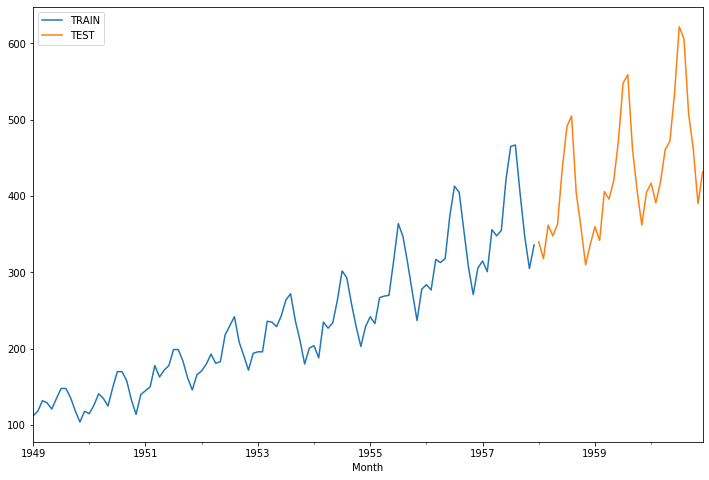

In [17]:
X_train = df.iloc[:108]
X_test = df.iloc[108:]
print('The size of the training data: '+ str(len(X_train)))
print('The size of the testing data: '+ str(len(X_test)))
X_train['Passengers'].plot(legend=True,label='TRAIN')
X_test['Passengers'].plot(legend=True,label='TEST',figsize=(12,8))

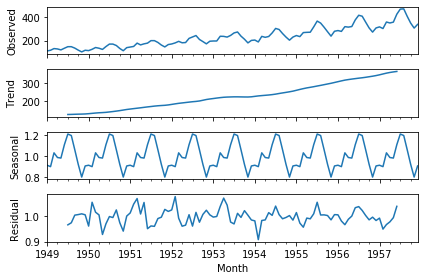

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(X_train['Passengers'],model='multiplicative').plot();

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


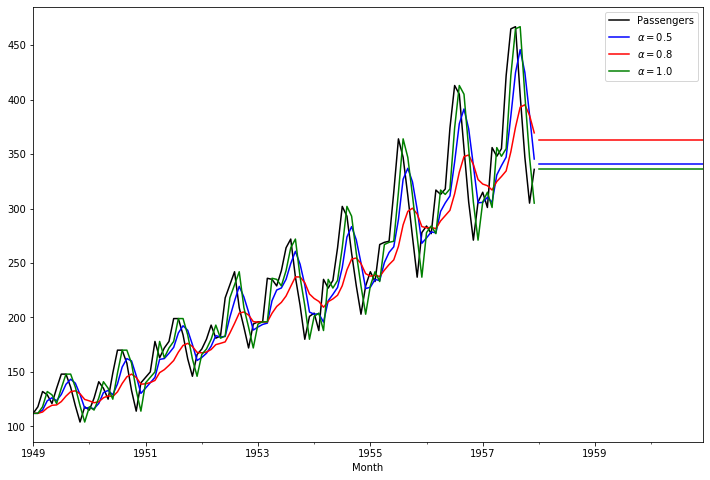

In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# Prepare data
data = X_train['Passengers']
# Create class
model = SimpleExpSmoothing(data)
# Fit model:modeliser les données
fit1 = model.fit(smoothing_level=0.5,optimized=False)
fit2 = model.fit(smoothing_level=0.2,optimized=False)
fit3 = model.fit(optimized=True, use_brute=True)

# Make predictions
#yhat = model_fit.predict(len(data), len(data))
fcast1 = fit1.forecast(36).rename(r'$\alpha=0.5$')#on applique les prévisions sur le modele
fcast2 = fit2.forecast(36).rename(r'$\alpha=0.8$')
fcast3 = fit3.forecast(36).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

# Plot the results
ax = data.plot(color='black', legend=True, figsize=(12,8))
fit1.fittedvalues.plot(ax=ax, color='blue')
fcast1.plot(ax=ax, color='blue', legend=True)
fit2.fittedvalues.plot(ax=ax, color='red')
fcast2.plot(ax=ax, color='red', legend=True)
fit3.fittedvalues.plot(ax=ax, color='green')
fcast3.plot(ax=ax, color='green', legend=True)

In [20]:
# Access all the model parameters
fit3.model.params

{'damping_slope': nan,
 'initial_level': 112.0,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 1.0,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [21]:
# Access the used model parameters
fit3.params_formatted

,name,param,optimized
smoothing_level,alpha,1.0,True
initial_level,l.0,112.0,True


In [22]:
# the model training error (sum square error)/tous les erreurs du modele d'entrainement
fit3.sse

71422.0

In [23]:
# the estimated values
fit3.fittedvalues

Month
1949-01-01    112.0
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1957-08-01    465.0
1957-09-01    467.0
1957-10-01    404.0
1957-11-01    347.0
1957-12-01    305.0
Length: 108, dtype: float64

In [24]:
# the forecasted values
fit3.fcastvalues
# or
fcast3.head()

1958-01-01    336.0
1958-02-01    336.0
1958-03-01    336.0
1958-04-01    336.0
1958-05-01    336.0
Freq: MS, Name: $\alpha=1.0$, dtype: float64

In [25]:
from sklearn.metrics import mean_squared_error
RMSE_train = np.sqrt(mean_squared_error(y_true = X_train.values, y_pred = fit3.fittedvalues.values))
RMSE_test = np.sqrt(mean_squared_error(y_true = X_test.values, y_pred = fcast3.values))
print('The training RMSE error of this model is: %.3f' %RMSE_train)
print('The testing RMSE error of this model is: %.3f' %RMSE_test)


The training RMSE error of this model is: 25.716
The testing RMSE error of this model is: 121.139


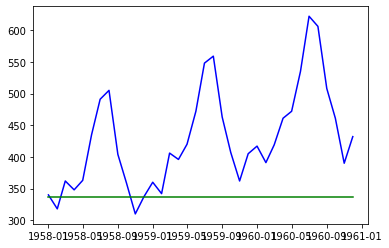

In [26]:
# Plot the tetsing and forecasting values
plt.plot(X_test, color='b')
plt.plot(fcast3, color='g')
plt.show()

In [27]:
# Summarize the fitted Model/on a utiliser le lissage exponnentiel simple pour la composante level
fit3.summary()
#selection du meilleur modele basé sur AIC,BIC

Dep. Variable:,endog,No. Observations:,108
Model:,SimpleExpSmoothing,SSE,71422.000
Optimized:,True,AIC,705.377
Trend:,None,BIC,710.741
Seasonal:,None,AICC,705.765
Seasonal Periods:,None,Date:,"Tue, 31 Dec 2019"
Box-Cox:,False,Time:,16:25:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,112.00000,l.0,True
